In [3]:
%matplotlib inline
import numpy as np

import qcodes as qc

from typing import List, Dict, Tuple, Any
import matplotlib.pyplot as plt
from matplotlib import ticker, gridspec
import qcodes as qc
from qcodes import Parameter, new_experiment, Measurement, initialise_database, load_or_create_experiment, load_by_id,initialise_or_create_database_at, load_by_id
from qcodes.dataset.plotting import plot_dataset,plot_by_id

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 150


In [4]:
initialise_or_create_database_at('F:\database\IMEC_AL00126614_D21_D1SD5.db') 


In [5]:
def set_real_aspect(ax):
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    aspect = (ylim[1]- ylim[0])/(xlim[1]- xlim[0])
    ax.set_aspect(aspect)
    return ax

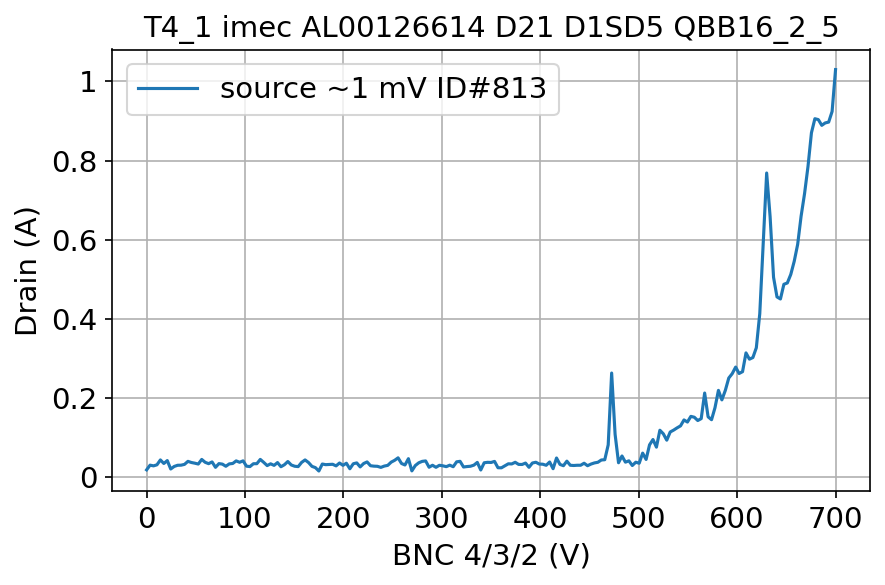

In [4]:
fig = plt.figure()
gs1 = gridspec.GridSpec(10,10)

ax=fig.add_subplot(gs1[:,:])

ID = 813
source_voltage = '1'
axes1,colorbar1 = plot_by_id(ID,axes=ax, label=f"source ~{source_voltage} mV ID#{ID}")

ax.set_xlabel('BNC 4/3/2 (V)',size=14)
ax.set_ylabel('Drain (A)',size=14)
ax.tick_params(labelsize=14) 
ax.set_title('T4_1 imec AL00126614 D21 D1SD5 QBB16_2_5',size=14)
ax.grid()
#ax.set_yscale('log')

ax.legend(fontsize=14)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
fig.savefig(f"{ID}_QBB16_2_5.png")


In [ ]:

ds = load_by_id(31)

x_label = ds.get_parameters()[1].label
y_label = ds.get_parameters()[0].label
z_label = ds.get_parameters()[2].label

data_xarray= ds.to_xarray_dataset()
data_xarray.basel.values = data_xarray.basel.values*1e9

z=1e9*ds.get_parameter_data()[ds.get_parameters()[2].name][ds.get_parameters()[2].name]

v_min = 0.05*(z.max()-z.min()) + z.min()
v_max = 0.55*(z.max()-z.min()) + z.min()
im = data_xarray.basel.plot.imshow(origin='lower',cmap = 'plasma', robust=True, vmin=v_min,vmax=v_max)

cb = im.colorbar
cb.set_label(label=f'{z_label} (n{ds.get_parameters()[2].unit})', size='12')
cb.ax.tick_params(labelsize='12')

ax = im.axes
ax = set_real_aspect(ax)

plt.xlabel(f'{x_label} ({ds.get_parameters()[1].unit})', size = 12)
plt.ylabel(f'{y_label} ({ds.get_parameters()[0].unit})',size = 12)
plt.title( f"T4_1 D1SD5 QBB16_2_5 run ID#{ds.captured_run_id}", size = 10)
plt.tick_params(labelsize= 12)
plt.tight_layout()
plt.locator_params(axis="y", nbins=6)
plt.locator_params(axis="x", nbins=6)

plt.savefig(f"{ds.captured_run_id}.png",bbox_inches='tight')


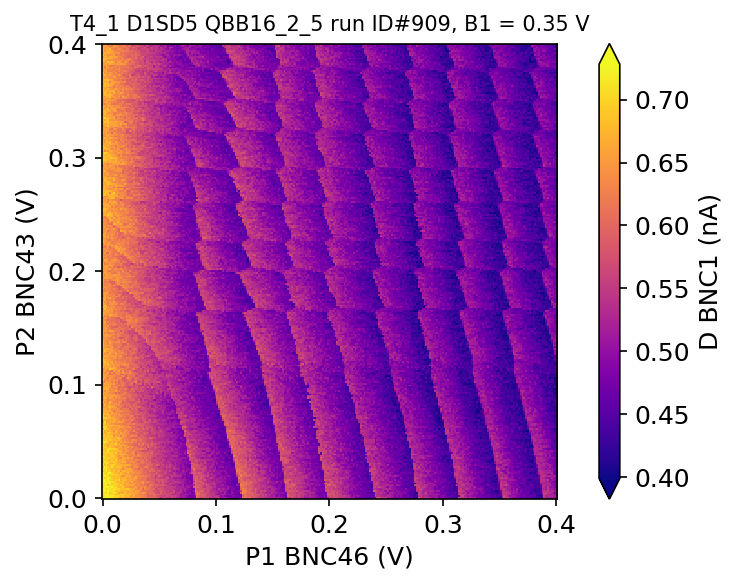

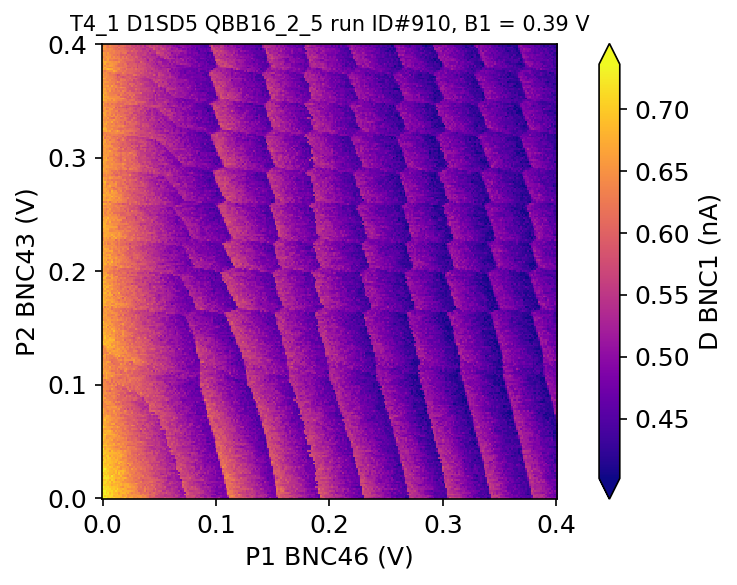

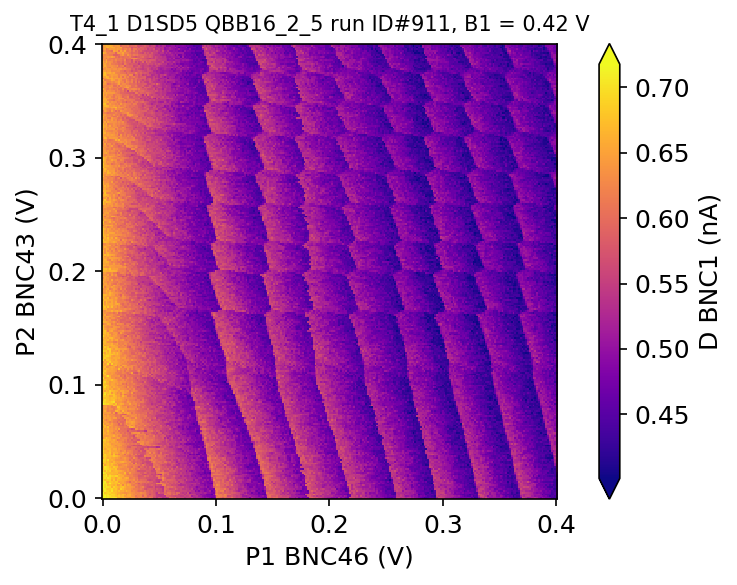

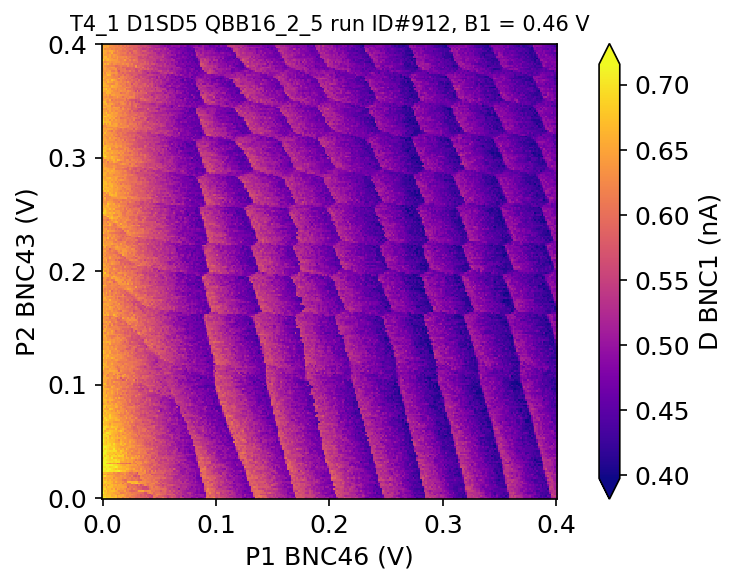

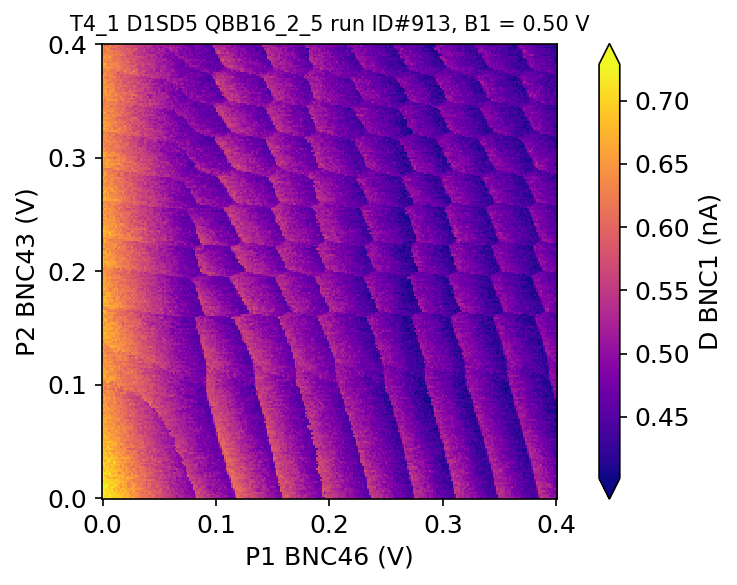

In [206]:
v_gate= np.linspace(0.35,0.5,5)
for i in range(len(v_gate)):
    plt.figure()
    ds=load_by_id(909+i)
    x_label = ds.get_parameters()[1].label
    y_label = ds.get_parameters()[0].label
    z_label = ds.get_parameters()[2].label

    data_xarray= ds.to_xarray_dataset()
    data_xarray.basel.values = data_xarray.basel.values*1e9

    z=1e9*ds.get_parameter_data()[ds.get_parameters()[2].name][ds.get_parameters()[2].name]

    v_min = 0.05*(z.max()-z.min()) + z.min()
    v_max = 0.95*(z.max()-z.min()) + z.min()
    im = data_xarray.basel.plot.imshow(origin='lower',cmap = 'plasma', robust=True, vmin=v_min,vmax=v_max)

    cb = im.colorbar
    cb.set_label(label=f'{z_label} (n{ds.get_parameters()[2].unit})', size='12')
    cb.ax.tick_params(labelsize='12')

    ax = im.axes
    ax = set_real_aspect(ax)

    plt.xlabel(f'{x_label} ({ds.get_parameters()[1].unit})', size = 12)
    plt.ylabel(f'{y_label} ({ds.get_parameters()[0].unit})',size = 12)
    plt.title( f"T4_1 D1SD5 QBB16_2_5 run ID#{ds.captured_run_id}, B1 = {v_gate[i]:.2f} V", size = 10)
    plt.tick_params(labelsize= 12)
    plt.tight_layout()
    plt.locator_params(axis="y", nbins=6)
    plt.locator_params(axis="x", nbins=6)

    plt.savefig(f"{ds.captured_run_id}.png",bbox_inches='tight')

In [20]:
%matplotlib qt

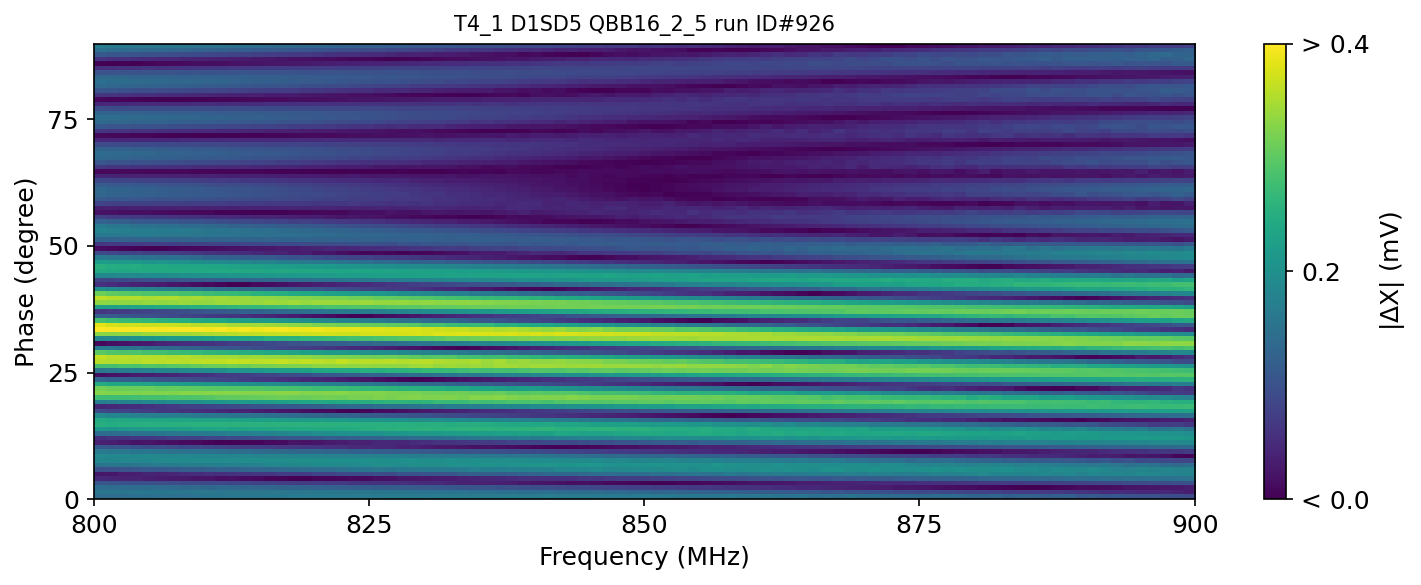

In [29]:
id = 925
ds=load_by_id(id)
x_label = ds.get_parameters()[0].label
y_label = ds.get_parameters()[1].label
z_label = ds.get_parameters()[2].label

x=ds.get_parameter_data()[ds.get_parameters()[2].name][ds.get_parameters()[0].name].flatten()
x = x*1e-6
y=ds.get_parameter_data()[ds.get_parameters()[2].name][ds.get_parameters()[1].name].flatten()
y = y*1
z1=ds.get_parameter_data()[ds.get_parameters()[2].name][ds.get_parameters()[2].name]
ds=load_by_id(id+1)
z2=ds.get_parameter_data()[ds.get_parameters()[2].name][ds.get_parameters()[2].name]
z = abs(z2-z1)*1e3

z=z.reshape(101,91)
#z = z.transpose()
#z= np.fliplr(z)
v_min = z.min()#0.05*z.max()
v_max = z.max()##.95*z.max()
c = plt.imshow(z,origin='lower',cmap = 'viridis', extent=(min(x),max(x),min(y),max(y)),aspect='auto', vmin=v_min,vmax=v_max)

cb = plt.colorbar(c, ticks=[v_min, (v_min + v_max)/2, v_max])
cb.ax.set_yticklabels([f'< {v_min:.1f}', f'{(v_min + v_max)/2:.1f}', f'> {v_max:.1f}'])
cb.set_label(label=f'|$\Delta${z_label}| (mV)', size='12')
cb.ax.tick_params(labelsize='12')

plt.xlabel(f'{x_label} (MHz)', size = 12)
plt.ylabel(f'{y_label} (degree)',size = 12)
plt.title( f"T4_1 D1SD5 QBB16_2_5 run ID#{ds.captured_run_id}", size = 10)
plt.tick_params(labelsize= 12)
plt.tight_layout()
plt.locator_params(axis="y", nbins=4)
plt.locator_params(axis="x", nbins=4)

plt.savefig(f"{ds.captured_run_id}_{ds.captured_run_id-1}.png",bbox_inches='tight')

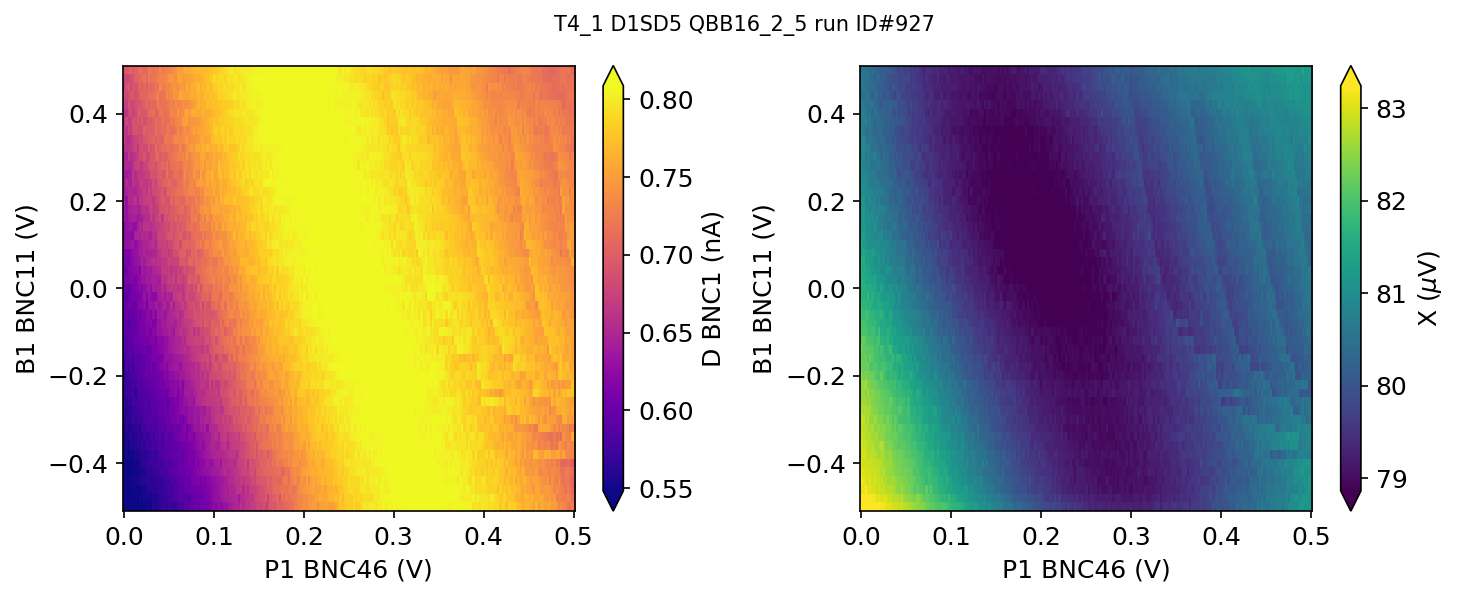

In [78]:
plt.rcParams['figure.figsize'] = [10, 4.0]
plt.rcParams['figure.dpi'] = 150

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle( f"T4_1 D1SD5 QBB16_2_5 run ID#{ds.captured_run_id}", size = 10)


ds = load_by_id(927)
x_label = ds.get_parameters()[1].label
y_label = ds.get_parameters()[0].label

z_label = ds.get_parameters()[4].label

data_xarray= ds.to_xarray_dataset()

data_xarray.basel.values = 1e9*data_xarray.basel.values
z= 1e9*ds.get_parameter_data()[ds.get_parameters()[4].name][ds.get_parameters()[4].name]

v_min = 0.05*(z.max()-z.min()) + z.min()
v_max = 0.95*(z.max()-z.min()) + z.min()
im = data_xarray.basel.plot.imshow(origin='lower',cmap = 'plasma', robust=True, vmin=v_min,vmax=v_max, ax=ax1)
cb = im.colorbar
cb.set_label(label=f'{z_label} (n{ds.get_parameters()[4].unit})', size='12')
cb.ax.tick_params(labelsize='12')

# ax1 = im.axes
# ax1 = set_real_aspect(ax1)

ax1.set_xlabel(f'{x_label} ({ds.get_parameters()[1].unit})', size = 12)
ax1.set_ylabel(f'{y_label} ({ds.get_parameters()[0].unit})',size = 12)
ax1.tick_params(labelsize= 12)

ax1.locator_params(axis="y", nbins=6)
ax1.locator_params(axis="x", nbins=6)

z2_label = ds.get_parameters()[2].label

data_xarray= ds.to_xarray_dataset()

data_xarray.lockin_X.values = 1e6*data_xarray.lockin_X.values
z2= 1e6*ds.get_parameter_data()[ds.get_parameters()[2].name][ds.get_parameters()[2].name]

v_min = 0.05*(z2.max()-z2.min()) + z2.min()
v_max = 0.95*(z2.max()-z2.min()) + z2.min()
im = data_xarray.lockin_X.plot.imshow(origin='lower',cmap = 'viridis', robust=True, vmin=v_min,vmax=v_max, ax=ax2)
cb = im.colorbar
cb.set_label(label=f'{z2_label} ($\mu${ds.get_parameters()[2].unit})', size='12')
cb.ax.tick_params(labelsize='12')

# ax1 = im.axes
# ax1 = set_real_aspect(ax1)

ax2.set_xlabel(f'{x_label} ({ds.get_parameters()[1].unit})', size = 12)
ax2.set_ylabel(f'{y_label} ({ds.get_parameters()[0].unit})',size = 12)
ax2.tick_params(labelsize= 12)

ax2.locator_params(axis="y", nbins=6)
ax2.locator_params(axis="x", nbins=6)
fig.tight_layout(pad=1.0)

plt.savefig(f"{ds.captured_run_id}.png",bbox_inches='tight')